In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import dateutil.parser

In [2]:
train= pd.read_csv('F:/Desktop/DataScience/Cycle_rent_prediction_Project/train.csv')
test= pd.read_csv('F:/Desktop/DataScience/Cycle_rent_prediction_Project/test.csv')

In [3]:
# shape of training and testing data
train.shape, test.shape

((12980, 12), (4399, 11))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
def Timestamp_into_continuous(dataFrame):
    
    ## convert the timestamp to a python date object 

    dataFrame['datetime'] = list(map(dateutil.parser.parse, dataFrame['datetime']))

    ## add dedicated columns for day, hour and weekday 

    dataFrame['hour'] = list(map(lambda v : v.hour,dataFrame['datetime']))
    dataFrame['date'] = list(map(lambda v : v.day, dataFrame['datetime']))
    dataFrame['month'] = list(map(lambda v : v.month, dataFrame['datetime']))

In [6]:
Timestamp_into_continuous(train)
train = train.drop('datetime', axis=1)

In [7]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,month
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,1,1
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2,1,1
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,3,1,1
4,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,4,1,1


In [10]:
# train.describe()
# train.dtypes
train.info()
# train.isnull().sum()
# test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 14 columns):
season        12980 non-null int64
holiday       12980 non-null int64
workingday    12980 non-null int64
weather       12980 non-null int64
temp          12980 non-null float64
atemp         12980 non-null float64
humidity      12980 non-null float64
windspeed     12980 non-null float64
casual        12980 non-null int64
registered    12980 non-null int64
count         12980 non-null int64
hour          12980 non-null int64
date          12980 non-null int64
month         12980 non-null int64
dtypes: float64(4), int64(10)
memory usage: 1.4 MB


In [11]:
Timestamp_into_continuous(test)
test = test.drop('datetime', axis=1)

In [12]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,date,month
0,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,1,30,6
1,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2,30,6
2,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,3,30,6
3,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,4,30,6
4,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,5,30,6


## Univariate Analysis

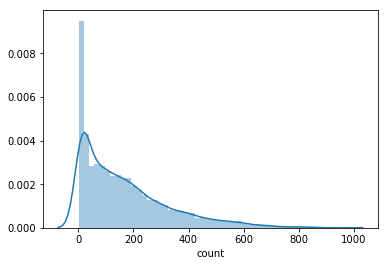

In [13]:
sn.distplot(train['count'])
plt.show()

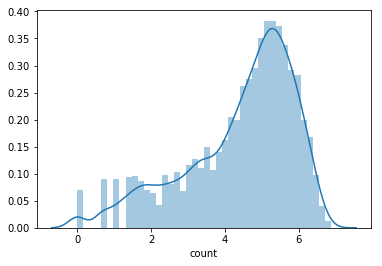

In [14]:
sn.distplot(np.log(train['count']))
plt.show()

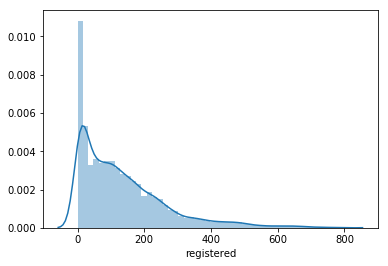

In [15]:
sn.distplot(train["registered"])
plt.show()

## Bivariate Analysis

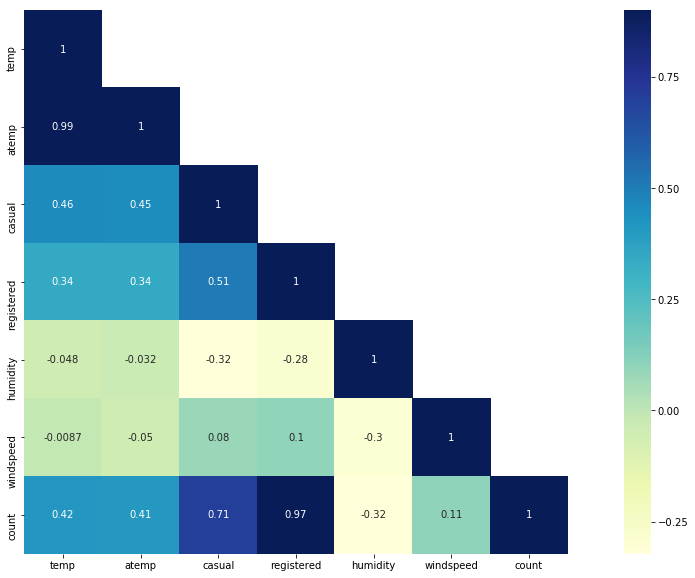

In [16]:
# looking at the correlation between numerical variables

corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

In [17]:
y_train = np.log(train['count'])
x_train = train.drop('count', axis=1)

In [18]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,date,month
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,0,1,1
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,1,1,1
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,2,1,1
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,3,1,1
4,1,0,0,1,9.84,14.395,75.0,0.0,0,1,4,1,1


In [19]:
# type(train['datetime'])

In [20]:
y_train.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: count, dtype: float64

In [21]:
x_test = test 

## Regression Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lreg = LinearRegression()

In [24]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
test_pred1= lreg.predict(x_test)

In [27]:
test_pred1

array([ 3.28965811,  3.30311759,  3.13129651, ...,  4.3099231 ,
        4.20030668,  4.15126509])

In [28]:
# rmse_test = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(test_pred)),2)))

In [29]:
lreg.score(x_train, y_train)

0.72917084074460992

In [30]:
# lreg.score(x_test, y_test)

In [31]:
prediction1 = np.exp(test_pred1)

In [32]:
# for x in prediction1:
#     print(x)

## DTr Model

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dtreg = DecisionTreeRegressor(max_depth=5)

In [35]:
dtreg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [36]:
dtreg.predict(x_test)

array([ 4.25383834,  4.25383834,  3.10071901, ...,  4.61355036,
        4.17351614,  4.17351614])

In [37]:
dtreg.score(x_train, y_train)

0.9913594095496292

In [38]:
test_pred2 = dtreg.predict(x_test)

In [39]:
prediction2 = np.exp(test_pred2)

In [40]:
prediction2

array([  70.37501802,   70.37501802,   22.21391767, ...,  100.84153814,
         64.94340128,   64.94340128])

### Finally, we will copy paste these predictions on the provided excel file to generate score.

In [42]:
# for x in prediction2:
#     print(x)